# Importing Important Libraries for Data Processing 

In [ ]:
# Data analysis
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno

# Data view
pd.options.display.max_columns=200

# Import basic visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data visualtization : Plotly library
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Data Analysis
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

# Loading the Dataset

In [ ]:
df = pd.read_csv("project_data.csv")
df.head()

HDI rank      Country  Human Development Index (HDI)   \
0         1  Switzerland                           0.962   
1         2       Norway                           0.961   
2         3      Iceland                           0.959   
3         4    Hong Kong                           0.952   
4         5    Australia                           0.951   

   Expected years of schooling  Mean years of schooling   \
0                         16.5                      13.9   
1                         18.2                      13.0   
2                         19.2                      13.8   
3                         17.3                      12.2   
4                         21.1                      12.7   

  Gross_National_Income  Life expectancy at birth  HDI Rank Value(2020)  \
0                66,933                      84.0                     3   
1                64,660                      83.2                     1   
2                55,782                      82.7                     2   
3                62,607                      85.5                     4   
4                49,238                      84.5                     5   

  Population Value(2021) Population Value(2020)       Area  
0              87,52,564              86,54,622     41,284  
1              54,92,570              54,21,241    323,802  
2               3,44,646               3,41,243    103,000  
3              75,85,785              74,96,981      1,104  
4            2,59,59,987            2,54,99,884  7,692,024

# Analysis Preparation 

Data Preparation (Data Preprocessing)

In [ ]:
#data preparition (Convtring String Values to Float type values for data visualization)

df["Gross_National_Income"] = [',' + each if ',' not in each else each for each in df["Gross_National_Income"]]
df["Gross_National_Income"] = [float(each.replace(',','')) for each in df["Gross_National_Income"]]

In [ ]:
#data preparition

df["Population Value(2020)"] = [',' + each if ',' not in each else each for each in df["Population Value(2020)"]]
df["Population Value(2020)"] = [float(each.replace(',','')) for each in df["Population Value(2020)"]]

In [ ]:
#data preparition

df["Population Value(2021)"] = [',' + each if ',' not in each else each for each in df["Population Value(2021)"]]
df["Population Value(2021)"] = [float(each.replace(',','')) for each in df["Population Value(2021)"]]

In [ ]:
#data preparition

df["Area"] = [',' + each if ',' not in each else each for each in df["Area"]]
df["Area"] = [float(each.replace(',','')) for each in df["Area"]]

Creating a new DataFrame "Continent" to classify each country according to their respective Continents

In [ ]:
# Organizing the countries under continent region

Continent = {'Africa' : {"Ivory Coast", 'Congo', 'Gambia', 'Egypt', 'Congo', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 
                         'Comoros', 'Congo/Republic of the Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 
                         'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 
                         'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
                         'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'},
             'Asia' : {'Syrian Arab Republic','Korea', 'Yemen, Rep.', 'Lao PDR', 'Kyrgyz Republic', 'Hong Kong SAR, China', 'Macao SAR, China', "Korea, Dem. People's Rep.", 'Iran, Islamic Rep.', 'Uzbekistan', 'Korea, Rep.', 'Brunei Darussalam', 'Afghanistan', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'British Indian Ocean Territory', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
                       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
                       'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 
                       'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekstan', 'Vietnam', 'Yemen'},
             'Europe' : {'Sint Maarten (Dutch part)','Moldova', 'Russian Federation', 'Slovak Republic', 'Faroe Islands', 'British Virgin Islands', 'Isle of Man', 'Channel Islands', 'Kosovo', 'Czech Republic', 'Albania', 'Andorra', 'Armenia', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia/Chech Republic', 'Denmark', 'Estonia',
                         'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 
                         'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
                         'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'}, 
             'North America' : {'St. Vincent and the Grenadines', 'Turks and Caicos Islands', 'St. Martin (French part)', 'Puerto Rico', 'St. Kitts and Nevis', 'Cayman Islands', 'Curacao', 'Nicaragua', 'Virgin Islands (U.S.)', 'St. Lucia', 'Bahamas, The', 'United States', 'Bermuda', 'Antigua and Barbuda', 'Bahamas, the', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti',
                                'Honduras', 'Jamaica', 'Mexico', 'Panama', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'Unided States of America'},
             'South America' : {'Venezuela, RB', 'Aruba', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'}, 
             'Oceania' : {'French Polynesia', 'Micronesia, Fed. Sts.', 'Guam', 'New Caledonia', 'American Samoa', 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'}}

In [ ]:
# function to add the respective continent region to each country

def return_continent(row) : 
    try : 
        for continent in Continent.keys() : 
            if row['Country'] in Continent[continent] : 
                return continent
    except : 
        return "Others"
df['Continent'] = df.apply(return_continent, axis = 1)

Previewing Datasets Continent wise

In [ ]:
# function to view the datasets Continent wise

dff = df[['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Population Value(2021)','Area']]
def function(continent):
    Continent_wise = df.loc[df.Continent == continent][['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Population Value(2021)','Area']]
    return Continent_wise

In [ ]:
# View the datasets Continent wise
value = input("Enter the continent region :")
con = function(value).head().sort_values(by = ['HDI rank'])
con.head()

Enter the continent region : Asia


HDI rank Continent    Country  HDI Rank Value(2020)  \
3          4      Asia  Hong Kong                     4   
11        12      Asia  Singapore                    10   
18        19      Asia      Japan                    19   
19        19      Asia      Korea                    20   
21        22      Asia     Israel                    22   

    Human Development Index (HDI)   Expected years of schooling  \
3                            0.952                         17.3   
11                           0.939                         16.5   
18                           0.925                         15.2   
19                           0.925                         16.5   
21                           0.919                         16.1   

    Mean years of schooling   Life expectancy at birth  Gross_National_Income  \
3                       12.2                      85.5                62607.0   
11                      11.9                      82.8                90919.0   
18                      13.4                      84.8                42274.0   
19                      12.5                      83.7                44501.0   
21                      13.3                      82.3                41524.0   

    Population Value(2020)  Population Value(2021)      Area  
3                7496981.0               7585785.0    1104.0  
11               5850342.0               5925135.0     710.0  
18             126476461.0             125802521.0  377930.0  
19              51269185.0              51331264.0  100210.0  
21               8655535.0               8868656.0   20770.0

Data Transformation

In [ ]:
# calculating Population density through population values and Area (sq_km)
dff['Pop_density_2020'] = dff['Population Value(2020)'] / dff['Area']
dff['Pop_density_2021'] = dff['Population Value(2021)'] / dff['Area']
dff.head(1)

HDI rank Continent      Country  HDI Rank Value(2020)  \
0         1    Europe  Switzerland                     3   

   Human Development Index (HDI)   Expected years of schooling  \
0                           0.962                         16.5   

   Mean years of schooling   Life expectancy at birth  Gross_National_Income  \
0                      13.9                      84.0                66933.0   

   Population Value(2020)  Population Value(2021)     Area  Pop_density_2020  \
0               8654622.0               8752564.0  41284.0        209.636227   

   Pop_density_2021  
0        212.008623

In [1]:
'''
dff['Pop_density_2021'] = dff['Pop_density_2021']*100
dff['Pop_density_2021'] = dff['Pop_density_2021']*100
'''

"\ndff['Pop_density_2021'] = dff['Pop_density_2021']*100\ndff['Pop_density_2021'] = dff['Pop_density_2021']*100\n"

In [ ]:
# Incorporating all colummns in order
dff = dff[['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Pop_density_2020','Population Value(2021)','Pop_density_2021','Area']]
dff.head()

HDI rank Continent      Country  HDI Rank Value(2020)  \
0         1    Europe  Switzerland                     3   
1         2    Europe       Norway                     1   
2         3    Europe      Iceland                     2   
3         4      Asia    Hong Kong                     4   
4         5   Oceania    Australia                     5   

   Human Development Index (HDI)   Expected years of schooling  \
0                           0.962                         16.5   
1                           0.961                         18.2   
2                           0.959                         19.2   
3                           0.952                         17.3   
4                           0.951                         21.1   

   Mean years of schooling   Life expectancy at birth  Gross_National_Income  \
0                      13.9                      84.0                66933.0   
1                      13.0                      83.2                64660.0   
2                      13.8                      82.7                55782.0   
3                      12.2                      85.5                62607.0   
4                      12.7                      84.5                49238.0   

   Population Value(2020)  Pop_density_2020  Population Value(2021)  \
0               8654622.0        209.636227               8752564.0   
1               5421241.0         16.742457               5492570.0   
2                341243.0          3.313039                344646.0   
3               7496981.0       6790.743659               7585785.0   
4              25499884.0          3.315107              25959987.0   

   Pop_density_2021       Area  
0        212.008623    41284.0  
1         16.962743   323802.0  
2          3.346078   103000.0  
3       6871.182065     1104.0  
4          3.374923  7692024.0

"Now our dataset has been extracted, parsed, cleaned, ordered and filtered."
"We shall begin with the Exploratory Data Analysis"

--------------------------------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis

In [ ]:
#  function importing

def missing(dff) : 
    missing_number = dff.isnull().sum().sort_values(ascending = False)
    missing_percent = (dff.isnull().sum()/dff.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_number', 'Missing_percent'])
    return missing_values 

def categorize(dff) :
    Quantitive_features = dff.select_dtypes([np.number]).columns.tolist()
    Categorical_features = dff.select_dtypes(exclude = [np.number]).columns.tolist()
    Discrete_features = [col for col in Quantitive_features if len(dff[col].unique()) < 10]
    Continuous_features = [col for col in Quantitive_features if col not in Discrete_features]
    print(f"Quantitive feautres : {Quantitive_features} \nDiscrete features : {Discrete_features} \nContinous features : {Continuous_features} \nCategorical features : {Categorical_features}\n")
    print(f"Number of quantitive feautres : {len(Quantitive_features)} \nNumber of discrete features : {len(Discrete_features)} \nNumber of continous features : {len(Continuous_features)} \nNumber of categorical features : {len(Categorical_features)}")
    
def unique(dff) : 
    tb1 = pd.DataFrame({'Columns' : dff.columns, 'Number_of_Unique' : dff.nunique().values.tolist(),
                       'Sample1' : dff.sample(1).values.tolist()[0], 'Sample2' : dff.sample(1).values.tolist()[0], 
                       'Sample3' : dff.sample(1).values.tolist()[0],
                       'Sample4' : dff.sample(1).values.tolist()[0], 'Sample5' : dff.sample(1).values.tolist()[0]})
    return tb1
    
def data_glimpse(dff) :   
    
    # Dataset preview 
    print("1. Dataset Preview \n")
    display(dff.head())
    print("-------------------------------------------------------------------------------\n")
    
    # Columns imformation
    print("2. Column Imformation \n")
    print(f"Dataset have {dff.shape[0]} columns and {dff.shape[1]} rows")
    print("\n") 
    print(f"Dataset Column name : {dff.columns.values}")
    print("\n")
    categorize(dff)
    print("-------------------------------------------------------------------------------\n")
    
    # Basic imformation table 
    
    #print("3. Missing data table : \n")
    #display(missing(dff))
    #print("-------------------------------------------------------------------------------\n")
    
    print("3. Number of unique value by column : \n")
    display(unique(dff))
    print("-------------------------------------------------------------------------------\n")
    
    print("4. Describe table : \n")
    display(dff.describe())
    print("-------------------------------------------------------------------------------\n")
    
    print("5. Table Info : \n")
    print(dff.info())
    print("-------------------------------------------------------------------------------\n")

# Data Glimpse

In [ ]:
# Data Glimpse

data_glimpse(dff)

1. Dataset Preview 



HDI rank Continent      Country  HDI Rank Value(2020)  \
0         1    Europe  Switzerland                     3   
1         2    Europe       Norway                     1   
2         3    Europe      Iceland                     2   
3         4      Asia    Hong Kong                     4   
4         5   Oceania    Australia                     5   

   Human Development Index (HDI)   Expected years of schooling  \
0                           0.962                         16.5   
1                           0.961                         18.2   
2                           0.959                         19.2   
3                           0.952                         17.3   
4                           0.951                         21.1   

   Mean years of schooling   Life expectancy at birth  Gross_National_Income  \
0                      13.9                      84.0                66933.0   
1                      13.0                      83.2                64660.0   
2                      13.8                      82.7                55782.0   
3                      12.2                      85.5                62607.0   
4                      12.7                      84.5                49238.0   

   Population Value(2020)  Pop_density_2020  Population Value(2021)  \
0               8654622.0        209.636227               8752564.0   
1               5421241.0         16.742457               5492570.0   
2                341243.0          3.313039                344646.0   
3               7496981.0       6790.743659               7585785.0   
4              25499884.0          3.315107              25959987.0   

   Pop_density_2021       Area  
0        212.008623    41284.0  
1         16.962743   323802.0  
2          3.346078   103000.0  
3       6871.182065     1104.0  
4          3.374923  7692024.0

-------------------------------------------------------------------------------

2. Column Imformation 

Dataset have 191 columns and 14 rows


Dataset Column name : ['HDI rank' 'Continent' 'Country' 'HDI Rank Value(2020)'
 'Human Development Index (HDI) ' 'Expected years of schooling'
 'Mean years of schooling ' 'Life expectancy at birth'
 'Gross_National_Income' 'Population Value(2020)' 'Pop_density_2020'
 'Population Value(2021)' 'Pop_density_2021' 'Area']


Quantitive feautres : ['HDI rank', 'HDI Rank Value(2020)', 'Human Development Index (HDI) ', 'Expected years of schooling', 'Mean years of schooling ', 'Life expectancy at birth', 'Gross_National_Income', 'Population Value(2020)', 'Pop_density_2020', 'Population Value(2021)', 'Pop_density_2021', 'Area'] 
Discrete features : [] 
Continous features : ['HDI rank', 'HDI Rank Value(2020)', 'Human Development Index (HDI) ', 'Expected years of schooling', 'Mean years of schooling ', 'Life expectancy at birth', 'Gross_National_Income', 

Columns  Number_of_Unique                Sample1  \
0                         HDI rank               162                    138   
1                        Continent                 6                 Africa   
2                          Country               190  Sao Tome and Principe   
3             HDI Rank Value(2020)               158                    139   
4   Human Development Index (HDI)                162                  0.618   
5      Expected years of schooling                89                   13.4   
6         Mean years of schooling                 88                    6.2   
7         Life expectancy at birth               137                   67.6   
8            Gross_National_Income               191                 4021.0   
9           Population Value(2020)               191               219159.0   
10                Pop_density_2020               191             227.343361   
11          Population Value(2021)               191               225954.0   
12                Pop_density_2021               191             234.392116   
13                            Area               190                  964.0   

       Sample2        Sample3     Sample4       Sample5  
0           33             21         166            91  
1       Europe  North America      Africa          Asia  
2       Greece  United States      Uganda  Turkmenistan  
3           33             21         166            93  
4        0.887          0.921       0.525         0.745  
5         20.0           16.3        10.1          13.2  
6         11.4           13.7         5.7          11.3  
7         80.1           77.2        62.7          69.3  
8      29002.0        64765.0      2181.0       13021.0  
9   10423054.0    331002651.0  45741007.0     6031200.0  
10   78.968513      35.315953   189.36455     12.356484  
11  10340571.0    334058426.0  47942521.0     6168788.0  
12   78.343594      35.641985  198.478663     12.638369  
13    131990.0      9372610.0    241550.0      488100.0

-------------------------------------------------------------------------------

4. Describe table : 



HDI rank  HDI Rank Value(2020)  Human Development Index (HDI)   \
count  191.000000            191.000000                      191.000000   
mean    95.811518             95.811518                        0.720576   
std     55.307333             55.279634                        0.150661   
min      1.000000              1.000000                        0.385000   
25%     48.500000             48.500000                        0.599500   
50%     96.000000             96.000000                        0.739000   
75%    143.500000            143.000000                        0.835000   
max    191.000000            191.000000                        0.962000   

       Expected years of schooling  Mean years of schooling   \
count                   191.000000                191.000000   
mean                     13.530366                  8.983770   
std                       2.926039                  3.173193   
min                       5.500000                  2.100000   
25%                      11.600000                  6.250000   
50%                      13.400000                  9.300000   
75%                      15.600000                 11.500000   
max                      21.100000                 14.100000   

       Life expectancy at birth  Gross_National_Income  \
count                191.000000             191.000000   
mean                  71.314660           20249.094241   
std                    7.646519           21825.264062   
min                   52.500000             732.000000   
25%                   65.750000            4593.000000   
50%                   71.700000           12306.000000   
75%                   76.700000           30079.500000   
max                   85.500000          146830.000000   

       Population Value(2020)  Pop_density_2020  Population Value(2021)  \
count            1.910000e+02        191.000000            1.910000e+02   
mean             4.078310e+07        238.820382            4.138417e+07   
std              1.490506e+08        799.654106            1.506400e+08   
min              1.179200e+04          2.095946            1.193100e+04   
25%              2.112812e+06         31.828749            2.125610e+06   
50%              8.737371e+06         85.114664            8.868656e+06   
75%              3.044945e+07        199.305851            3.150159e+07   
max              1.439324e+09       8239.918310            1.447065e+09   

       Pop_density_2021          Area  
count        191.000000  1.910000e+02  
mean         242.445608  7.052124e+05  
std          810.396695  1.929770e+06  
min            2.147705  2.600000e+01  
25%           32.463761  2.445650e+04  
50%           88.768353  1.184840e+05  
75%          201.870261  5.398315e+05  
max         8345.260563  1.709824e+07

-------------------------------------------------------------------------------

5. Table Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HDI rank                        191 non-null    int64  
 1   Continent                       185 non-null    object 
 2   Country                         191 non-null    object 
 3   HDI Rank Value(2020)            191 non-null    int64  
 4   Human Development Index (HDI)   191 non-null    float64
 5   Expected years of schooling     191 non-null    float64
 6   Mean years of schooling         191 non-null    float64
 7   Life expectancy at birth        191 non-null    float64
 8   Gross_National_Income           191 non-null    float64
 9   Population Value(2020)          191 non-null    float64
 10  Pop_density_2020                191 non-null    float64
 11

# Continent - Country: Human Development Index (HDI) analysis

--------------------------------------------------------------------------------

Creating Continent wise Datasets for "Country Vs Continent Analysis"

--------------------------------------------------------------------------------


In [ ]:
asian = dff.loc[dff.Continent == 'Asia'][['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Pop_density_2020','Population Value(2021)','Pop_density_2021','Area']]
africa = dff.loc[dff.Continent == 'Africa'][['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Pop_density_2020','Population Value(2021)','Pop_density_2021','Area']]
n_america = dff.loc[dff.Continent == 'North America'][['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Pop_density_2020','Population Value(2021)','Pop_density_2021','Area']]
s_america = dff.loc[dff.Continent == 'South America'][['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Pop_density_2020','Population Value(2021)','Pop_density_2021','Area']]
oceania = dff.loc[dff.Continent == 'Oceania'][['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Pop_density_2020','Population Value(2021)','Pop_density_2021','Area']]
europe = dff.loc[dff.Continent == 'Europe'][['HDI rank','Continent','Country','HDI Rank Value(2020)','Human Development Index (HDI) ','Expected years of schooling','Mean years of schooling ','Life expectancy at birth','Gross_National_Income','Population Value(2020)','Pop_density_2020','Population Value(2021)','Pop_density_2021','Area']]


===================================================================================

Correlations among Columns

===================================================================================

"Income and Human Development Correlation"

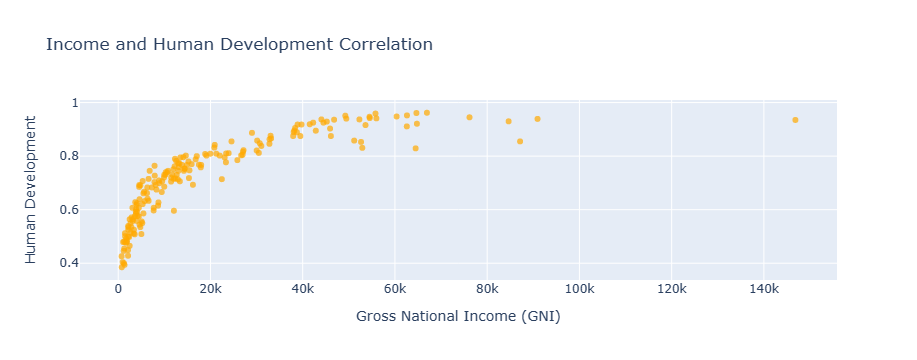

In [ ]:


trace1 = go.Scatter(
                    x = dff["Gross_National_Income"],
                    y = dff["Human Development Index (HDI) "],
                    mode = "markers",
                    marker = dict(color = 'rgba(256,169,1, 0.7)'),
                    text = dff["Country"]
)
layout_result = dict(title = "Income and Human Development Correlation", #hovermode='closest',
             xaxis = dict(title = "Gross National Income (GNI) ", ticklen = 5, zeroline = False),
             yaxis = dict(title = "Human Development", ticklen = 5, zeroline = False))
fig = dict(data = [trace1], layout = layout_result)
iplot(fig)

-----------------------------------------------------------------------------------------------------

"Life Expectancy and Human Development Correlation"



In [ ]:
# Life Expectancy and Human Development Correlation

fig = dict(
    data = [go.Scatter(
                    x = dff["Life expectancy at birth"],
                    y = dff["Human Development Index (HDI) "],
                    mode = "markers",
                    marker = dict(color = 'rgba(1,189,255, 0.7)'),
                    text = dff["Country"]
            )], 
    
    layout = dict(title = "Life Expectancy and Human Development Correlation",
             xaxis = dict(title = "Life Expectancy at Birth", ticklen = 5, zeroline = False),
             yaxis = dict(title = "Human Development", ticklen = 5, zeroline = False)))
iplot(fig)


--------------------------------------------------------------------------------------------------
"Education and Human Development Correlation"

In [ ]:
# Education and Human Development Correlation

fig = dict(
    data = [go.Scatter(
                    x = dff["Mean years of schooling "],
                    y = dff["Human Development Index (HDI) "],
                    mode = "markers",
                    marker = dict(color = 'rgba(205,10,169, 0.7)'),
                    text = dff["Country"]
            )], 
    
    layout = dict(title = "Education and Human Development Correlation",
             xaxis = dict(title = "Mean Years of Education", ticklen = 5, zeroline = False),
             yaxis = dict(title = "Human Development", ticklen = 5, zeroline = False)))
iplot(fig)

-----------------------------------------------------------------------------------------------

"Population Comparison (2020) & (2021)"

In [ ]:
# Population Comparison (2020) & (2021)

fig = dict(
    data = [go.Scatter(
                    x = dff["Population Value(2020)"],
                    y = dff["Population Value(2021)"],
                    mode = "markers",
                    marker = dict(color = 'rgba(180,109,20, 0.9)'),
                    text = dff["Country"]
            )], 
    
    layout = dict(title = "Population Comparison (2020) & (2021)",
             xaxis = dict(title = "Population Value(2020)", ticklen = 1, zeroline = False),
             yaxis = dict(title = "Population Value(2021)", ticklen = 1, zeroline = False)))
iplot(fig)


-------------------------------------------------------------------------

"Continent wise HDI and GNI plotting"

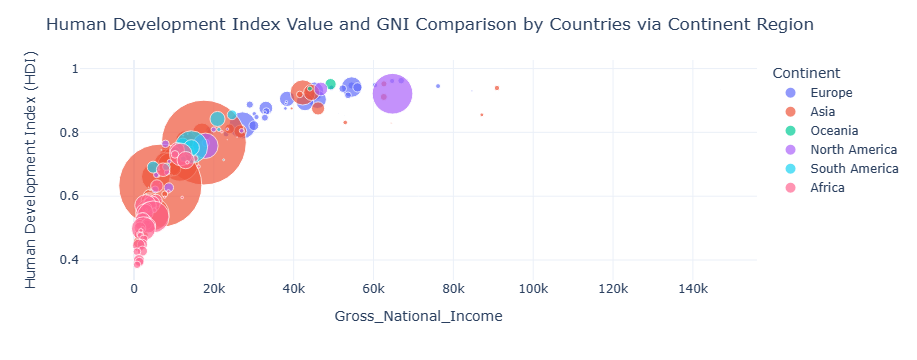

In [ ]:
fig = px.scatter(dff, 
                 x = "Gross_National_Income",
                 y = "Human Development Index (HDI) ",
                 animation_group = "Country",
                 size = "Population Value(2020)",
                 template = "plotly_white",
                 color = "Continent", 
                 hover_name = "Country", 
                 size_max = 60)
fig.update_layout(title = "Human Development Index Value and GNI Comparison by Countries via Continent Region")
fig.show()

Continent wise GNI and HDI plotting 

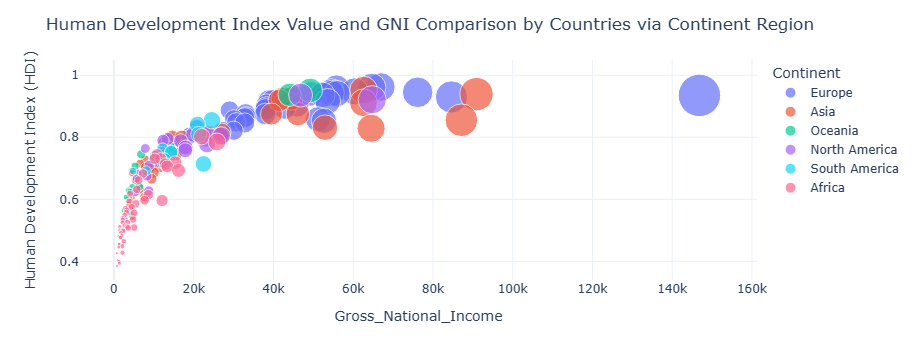

In [ ]:
fig = px.scatter(dff, 
                 x = "Gross_National_Income",
                 y = "Human Development Index (HDI) ",
                 animation_group = "Country",
                 size = "Gross_National_Income",
                 template = "plotly_white",
                 color = "Continent", 
                 hover_name = "Country", 
                 size_max = 30)
fig.update_layout(title = "Human Development Index Value and GNI Comparison by Countries via Continent Region")
fig.show()

---------------------------------------------------------------------------------------

GNI percentage of each continent

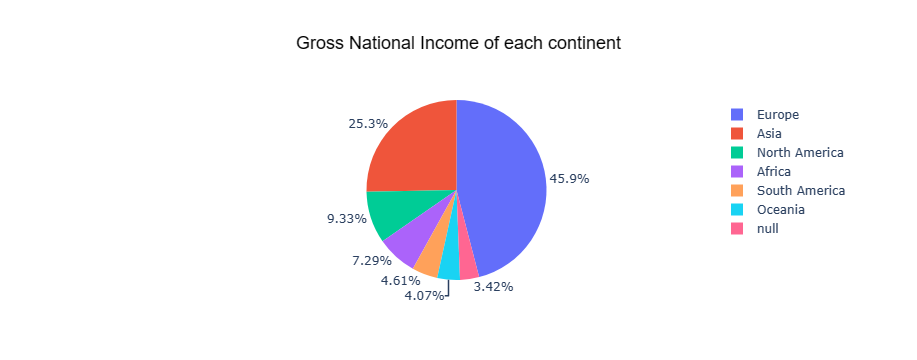

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=dff['Continent'], values=dff['Gross_National_Income'], name="Global Economy Percentage"))
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=12, 
                  uniformtext_mode='hide',
                  title=dict(text = 'Gross National Income of each continent',
                             font=dict(family='Arial', 
                                       size=18, 
                                       color='black'),
                             x=0.5,
                             y=0.9,
                             xanchor='center',
                             yanchor='top'))              
fig.show()

------------------------------------------------------------------------------------

World Population (2020) "Continent wise"

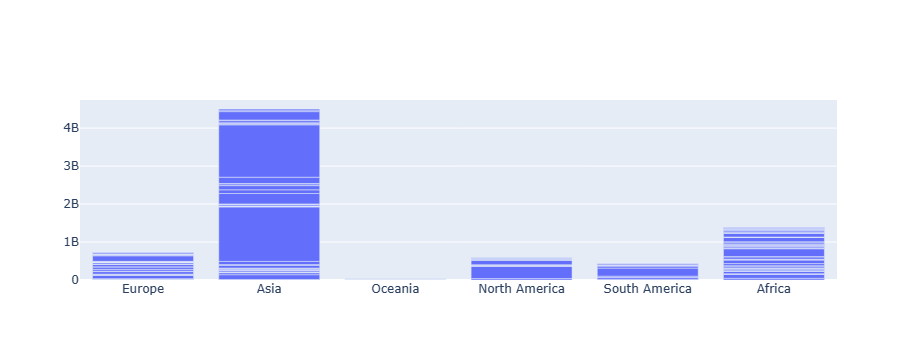

In [ ]:
fig=go.Figure()
fig.add_trace(go.Bar(x=dff['Continent'], 
                       y=dff['Population Value(2020)'],
                       name ='Total volume',
                       visible=True,
                     ))
fig.show()

------------------------------------------------------------------------------

Population Comparison

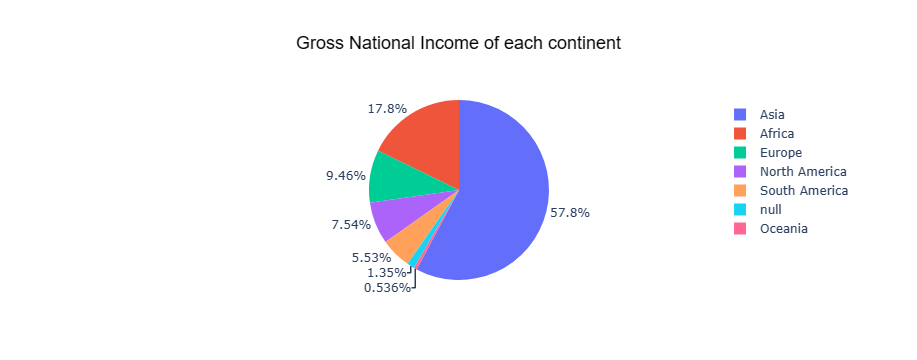

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=dff['Continent'], values=dff['Population Value(2020)'], name="Global Population"))
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=12, 
                  uniformtext_mode='hide',
                  title=dict(text = 'Gross National Income of each continent',
                             font=dict(family='Arial', 
                                       size=18, 
                                       color='black'),
                             x=0.5,
                             y=0.9,
                             xanchor='center',
                             yanchor='top'))              
fig.show()

=========================================================================================

Relationship between Life expectancy and Gross National Income

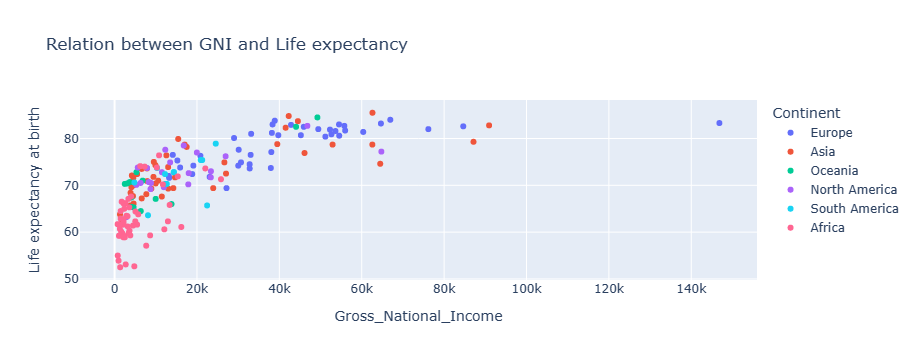

<Figure size 1200x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,7))
fig_color_en = px.scatter(
    dff,
    x = dff['Gross_National_Income'],
    y = dff['Life expectancy at birth'],
    #Color Property
    color = "Continent",
    title = 'Relation between GNI and Life expectancy'
)

fig_color_en.show()

"As we can infer that a country with less GNI doesn't necessarily mean that they'll have less Life expectancy.
European Countries do have greater life expectancy than most other countries.
Therefore we'll further analyze our data."

Relationship between Mean years of schooling and GNI

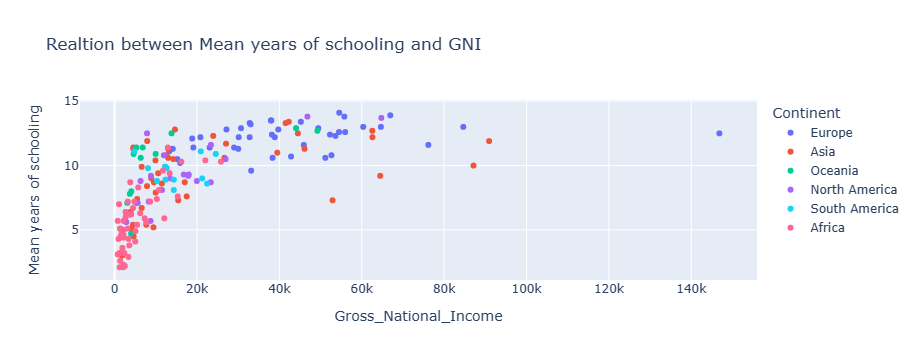

<Figure size 1200x700 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,7))
fig_color_en = px.scatter(
    dff,
    x = dff['Gross_National_Income'],
    y = dff['Mean years of schooling '],
    #Color Property
    color = "Continent",
    title = 'Realtion between Mean years of schooling and GNI'
)

fig_color_en.show()

"Again we can clearly see that a country with low GNI does have low Mean years of schooling value. On a broader spectrum, many countries ranging between the 30k - 60k GNI have decent schooling years.
Moreover, Continent wise, Europe has the best schooling years than other continents. 
Therefore we'll further analyze our data."

# Asian Countries

HDI Vs GNI plot

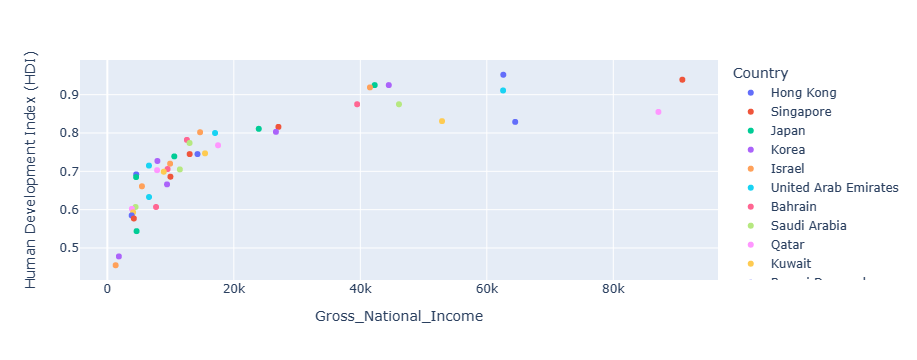

In [ ]:
fig = px.scatter(asian, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)
fig = px.scatter(asian, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)

---------------------------------------------------------------------------------------------------------

India's comparison to other Asian countries (Life expectancy)

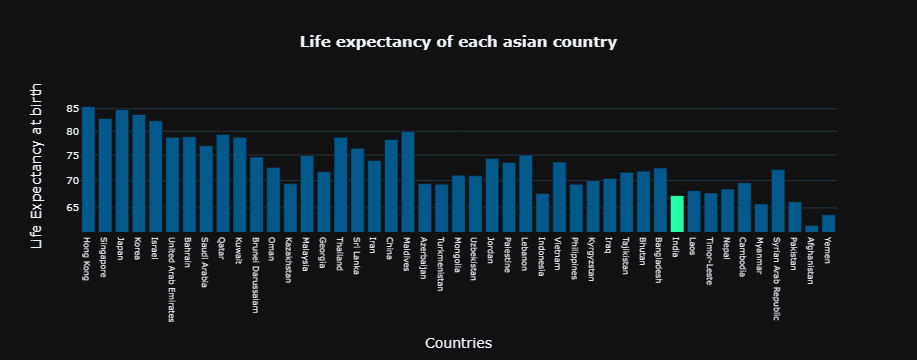

In [ ]:
df_plot = asian.reset_index()

colors = ['#03588C'] * len(df_plot.index)
colors[np.where(df_plot['Country'] == 'India')[0][0]] = '#22FFA7'    

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Life expectancy at birth'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Life expectancy of each asian country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Life Expectancy at birth",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

India's comparison to other Asian countries (Mean years of schooling)

In [ ]:
df_plot = asian.reset_index()

colors = ['#03588C'] * len(df_plot.index)
colors[np.where(df_plot['Country'] == 'India')[0][0]] = '#22FFA7'    
    

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Mean years of schooling '],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Mean years of schooling of each asian country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Mean years of schooling",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

India's comparison to other Asian countries (Expected years of schooling)

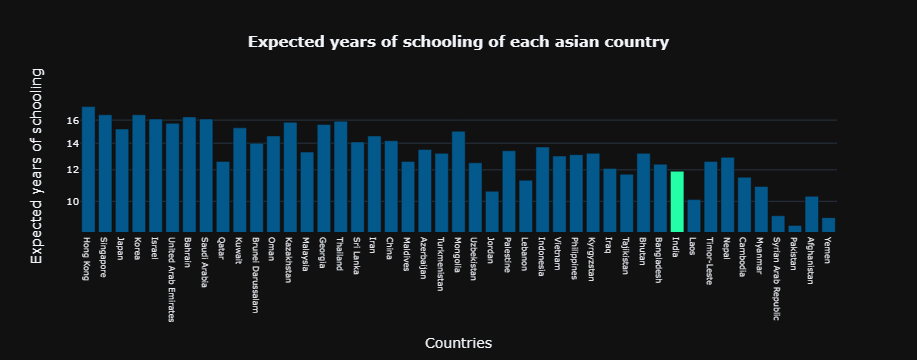

In [ ]:
df_plot = asian.reset_index()

colors = ['#03588C'] * len(df_plot.index)
colors[np.where(df_plot['Country'] == 'India')[0][0]] = '#22FFA7'    
    

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Expected years of schooling'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Expected years of schooling of each asian country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Expected years of schooling",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Population comparison in Asian countries

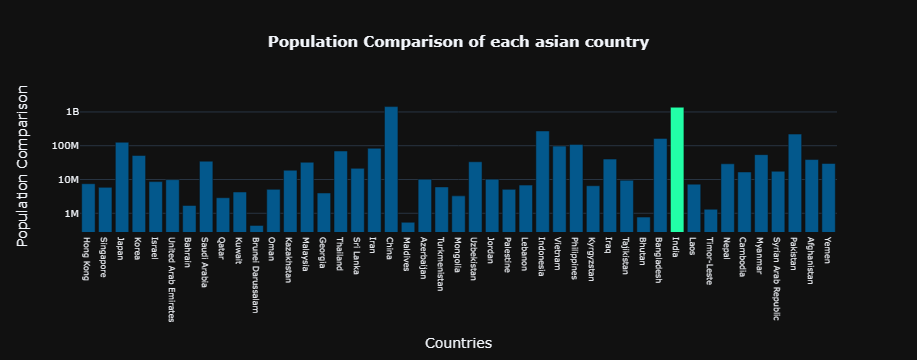

In [ ]:
df_plot = asian.reset_index()

colors = ['#03588C'] * len(df_plot.index)
colors[np.where(df_plot['Country'] == 'India')[0][0]] = '#22FFA7'    
    

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Population Value(2020)'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Population Comparison of each asian country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Population Comparison",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

Relation between Area and Countries

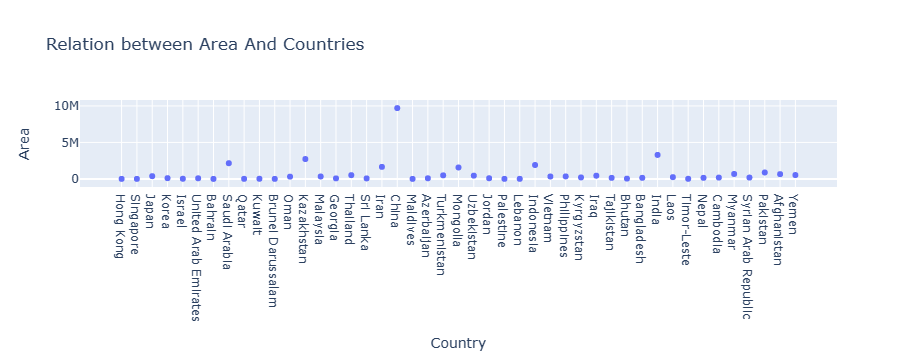

In [ ]:

fig_color_en = px.scatter(
    asian,
    x = asian['Country'],
    y = asian['Area'],
    #Color Property,
    title = 'Relation between Area And Countries'
)

fig_color_en.show()

# North American Countries

In [ ]:
HDI Vs GNI plot

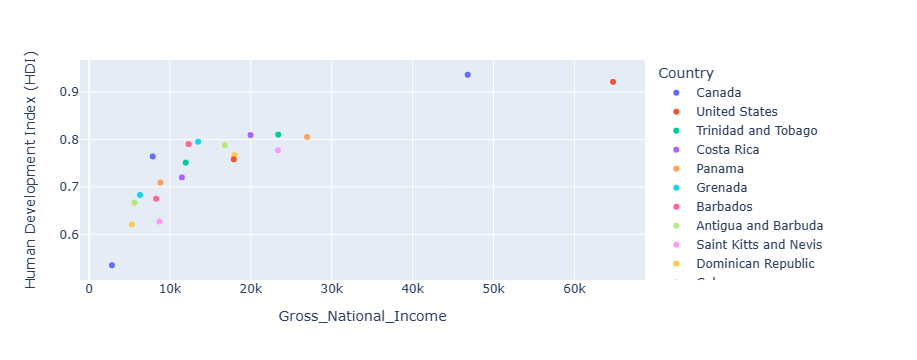

In [ ]:
fig = px.scatter(n_america, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)
fig = px.scatter(n_america, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)


---------------------------------------------------------------------------------------------------------

Life expectancy comparison in North American countries

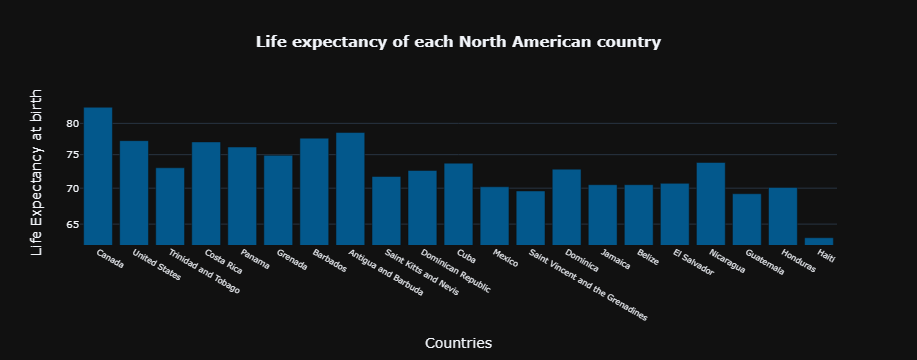

In [ ]:
df_plot = n_america.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Life expectancy at birth'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Life expectancy of each North American country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Life Expectancy at birth",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Mean years of schooling comparison in North American countries

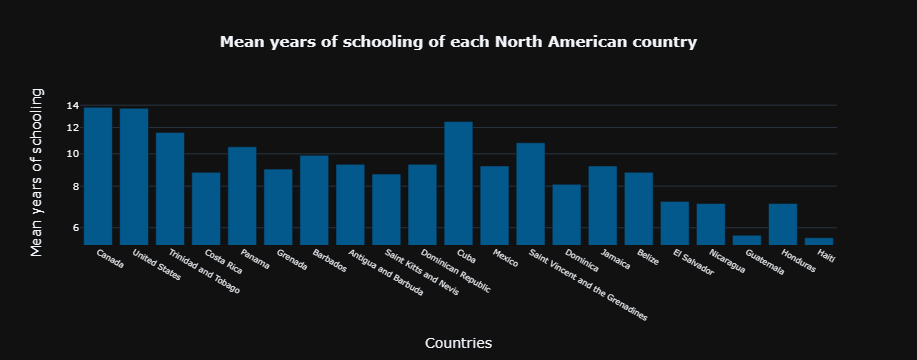

In [ ]:
df_plot = n_america.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Mean years of schooling '],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Mean years of schooling of each North American country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Mean years of schooling",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Expected years of schooling comparison in North American countries

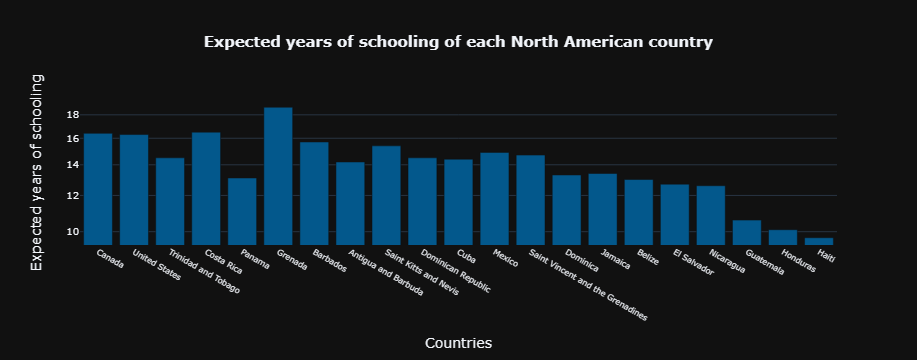

In [ ]:
df_plot = n_america.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Expected years of schooling'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Expected years of schooling of each North American country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Expected years of schooling",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Population comparison in North American countries

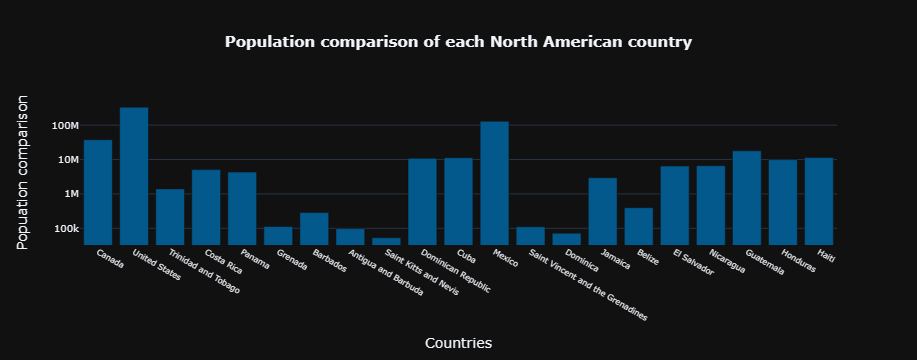

In [ ]:
df_plot = n_america.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Population Value(2020)'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Population comparison of each North American country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Popuation comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

-----------------------------------------------------------------------------

Relation between areas and countries

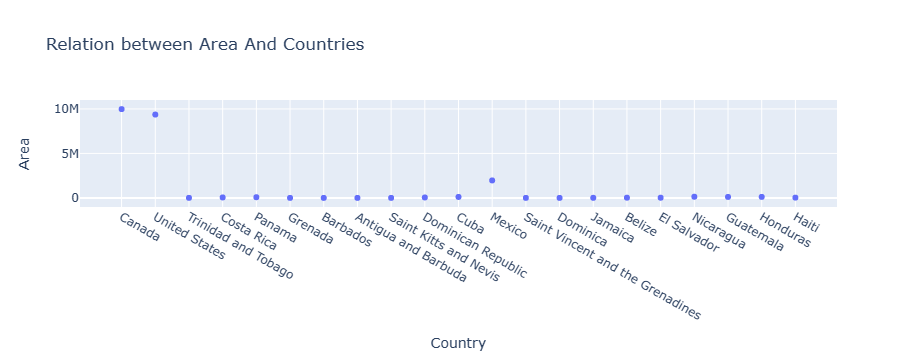

In [ ]:

fig_color_en = px.scatter(
    n_america,
    x = n_america['Country'],
    y = n_america['Area'],
    #Color Property,
    title = 'Relation between Area And Countries'
)

fig_color_en.show()

# South American countries

HDI Vs GNI plot

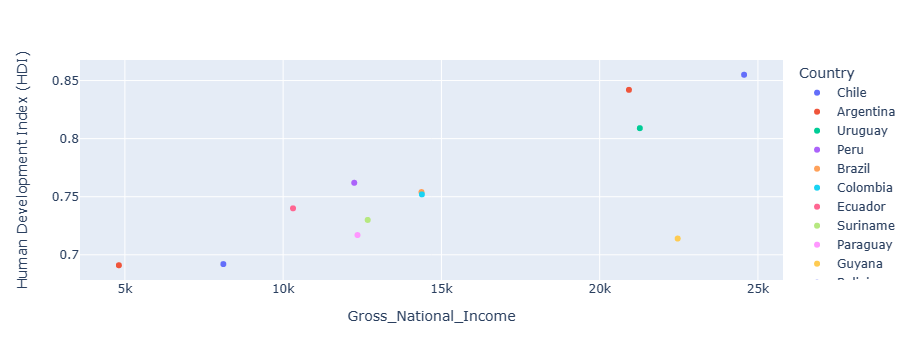

In [ ]:
fig = px.scatter(s_america, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)
fig = px.scatter(s_america, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)

---------------------------------------------------------------------------------------------------------

Life expectancy comparison in South American countries

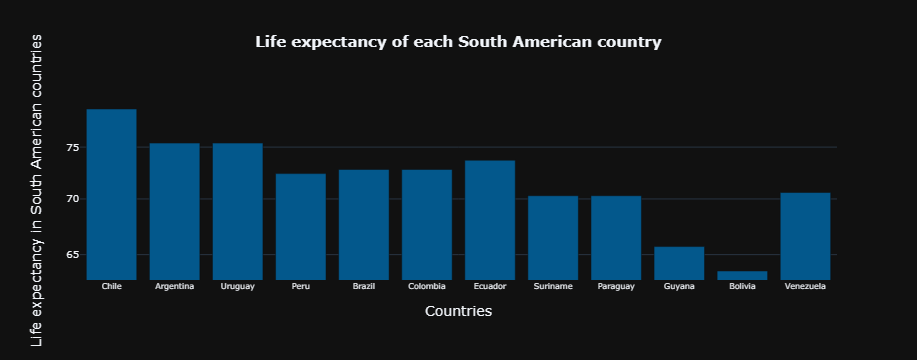

In [ ]:
df_plot = s_america.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Life expectancy at birth'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Life expectancy of each South American country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Life expectancy in South American countries",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Mean years of schooling comparison in South American countries

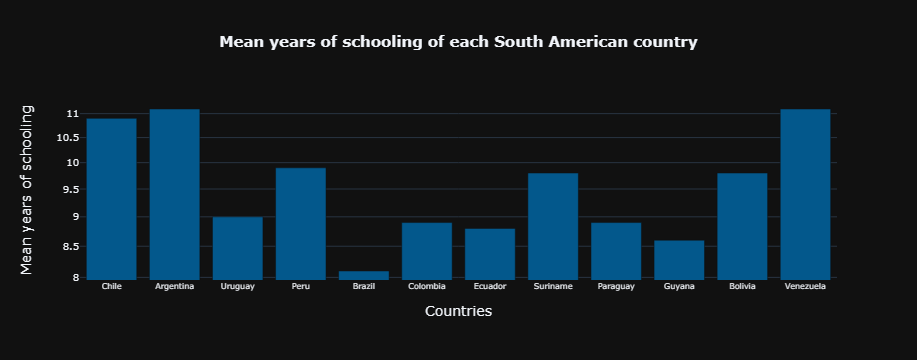

In [ ]:
df_plot = s_america.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Mean years of schooling '],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Mean years of schooling of each South American country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Mean years of schooling",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Expected years of schooling comparison in South American countries

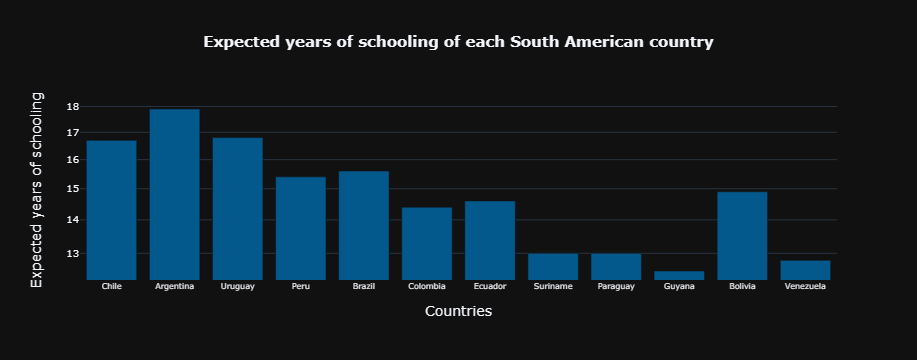

In [ ]:
df_plot = s_america.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Expected years of schooling'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Expected years of schooling of each South American country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Expected years of schooling",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Population comparison in South American countries

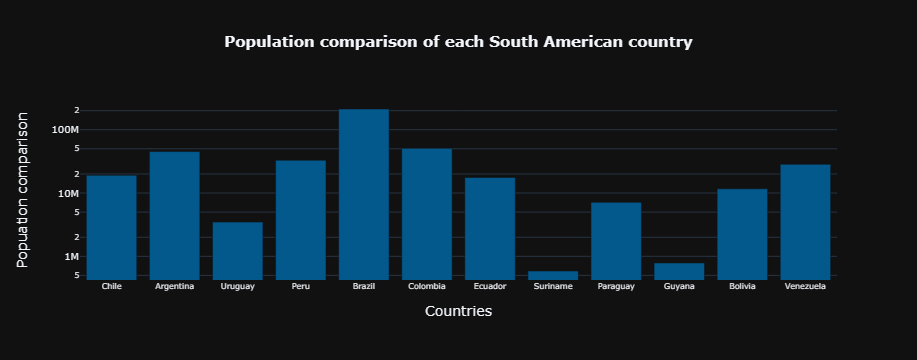

In [ ]:
df_plot = s_america.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Population Value(2020)'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Population comparison of each South American country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Popuation comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

-----------------------------------------------------------------------------

Relation between areas and countries

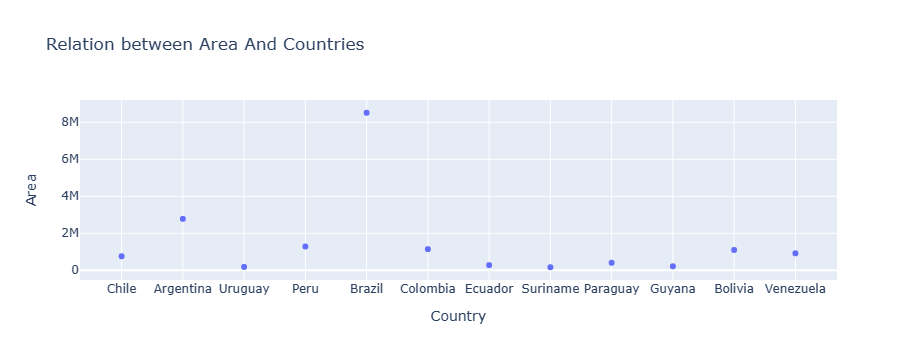

In [ ]:

fig_color_en = px.scatter(
    s_america,
    x = s_america['Country'],
    y = s_america['Area'],
    #Color Property,
    title = 'Relation between Area And Countries'
)

fig_color_en.show()

# Oceanic countries

HDI vs GNI plot

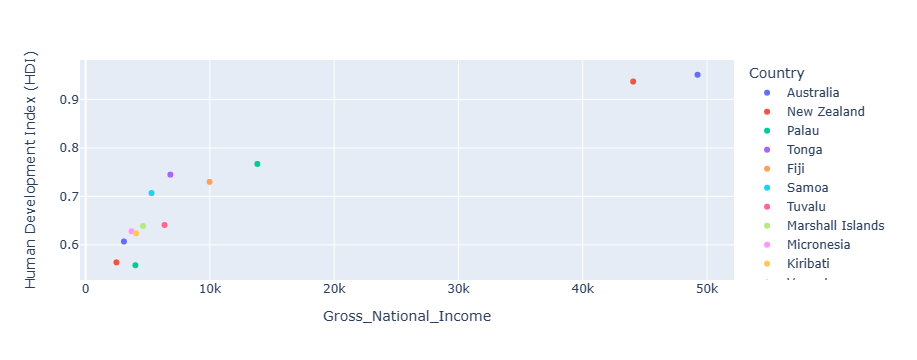

In [ ]:
fig = px.scatter(oceania, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)
fig = px.scatter(oceania, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)

---------------------------------------------------------------------------------------------------------

Life expectancy comparison in Oceania countries

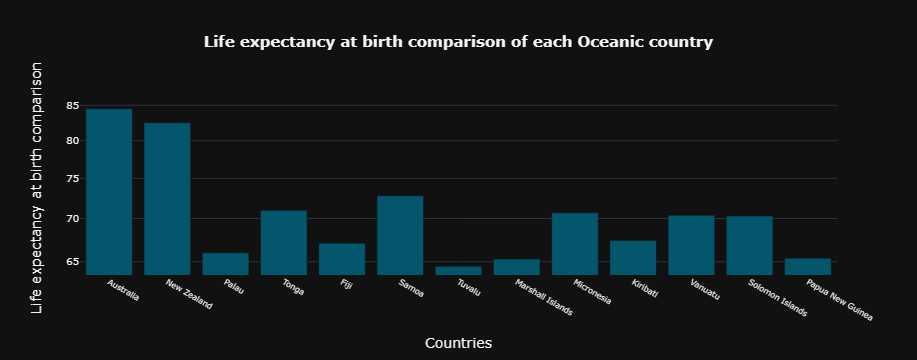

In [ ]:
df_plot = oceania.reset_index()

colors = ['#03566C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Life expectancy at birth'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Life expectancy at birth comparison of each Oceanic country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Life expectancy at birth comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Mean years of schooling comparison in Oceania countries

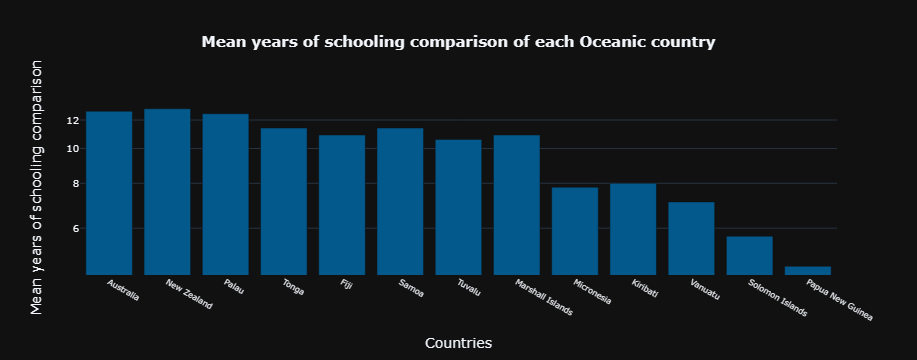

In [ ]:
df_plot = oceania.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Mean years of schooling '],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Mean years of schooling comparison of each Oceanic country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Mean years of schooling comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Expected years of schooling comparison in Oceania countries

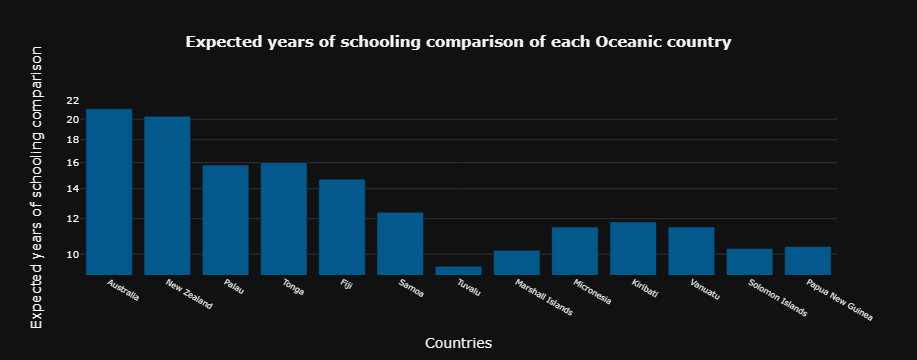

In [ ]:
df_plot = oceania.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Expected years of schooling'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Expected years of schooling comparison of each Oceanic country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Expected years of schooling comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Population comparison in Oceania countries

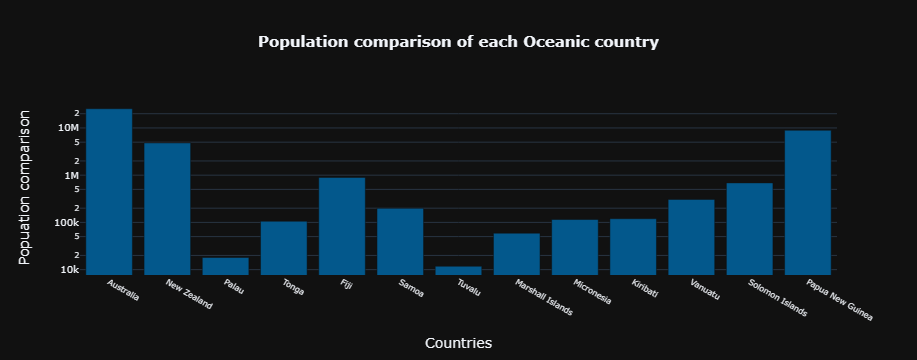

In [ ]:
df_plot = oceania.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Population Value(2020)'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Population comparison of each Oceanic country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Popuation comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

-----------------------------------------------------------------------------

Relation between areas and countries

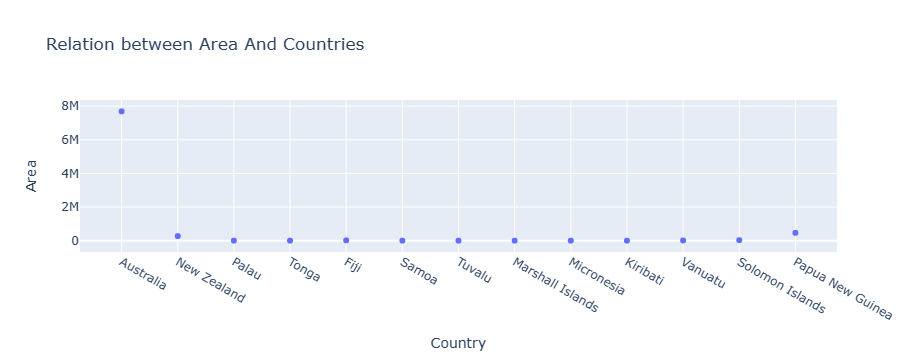

In [ ]:

fig_color_en = px.scatter(
    oceania,
    x = oceania['Country'],
    y = oceania['Area'],
    #Color Property,
    title = 'Relation between Area And Countries'
)

fig_color_en.show()

# African countries

HDI vs GNI plot

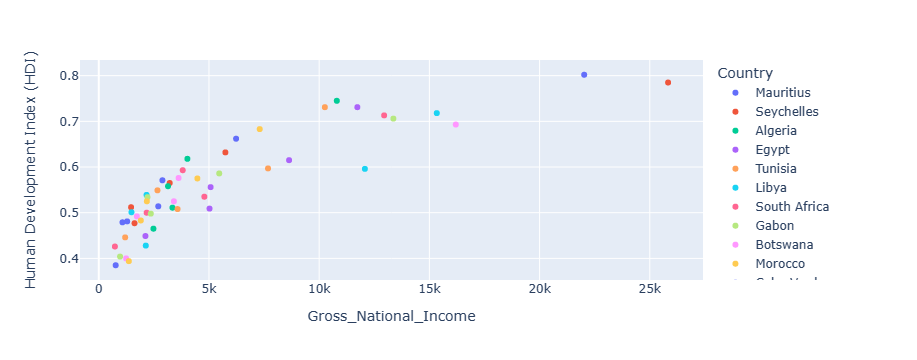

In [ ]:
fig = px.scatter(africa, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)
fig = px.scatter(africa, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)

---------------------------------------------------------------------------------------------------------

Life expectancy at birth comparison in African countries

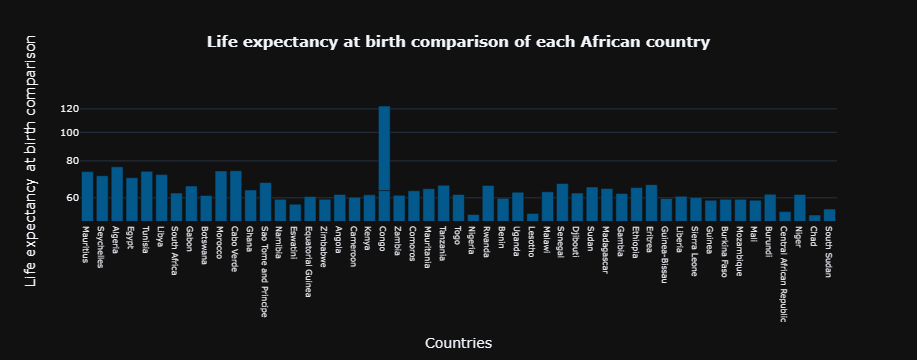

In [ ]:
df_plot = africa.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Life expectancy at birth'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Life expectancy at birth comparison of each African country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Life expectancy at birth comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Mean years of schooling comparison in African countries

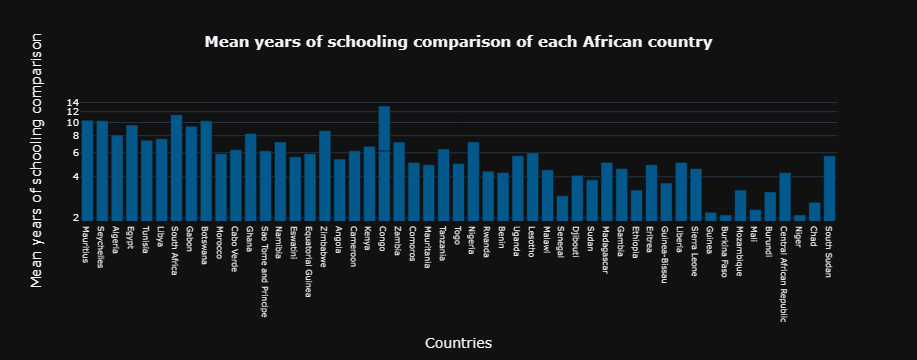

In [ ]:
df_plot = africa.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Mean years of schooling '],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Mean years of schooling comparison of each African country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Mean years of schooling comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Expected years of schooling comparison in African countries

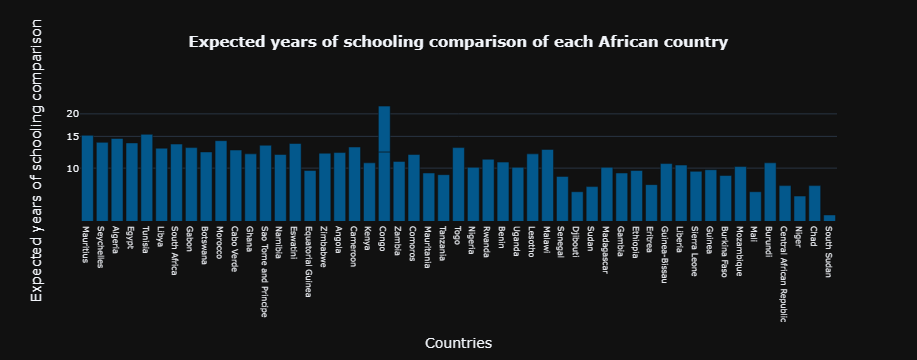

In [ ]:
df_plot = africa.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Expected years of schooling'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Expected years of schooling comparison of each African country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Expected years of schooling comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Population comparison in African countries

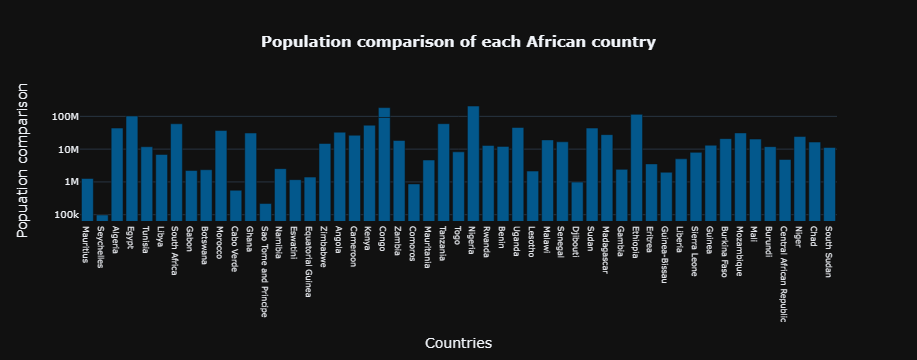

In [ ]:
df_plot = africa.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Population Value(2020)'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Population comparison of each African country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Popuation comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

Relation between Countries and Area 

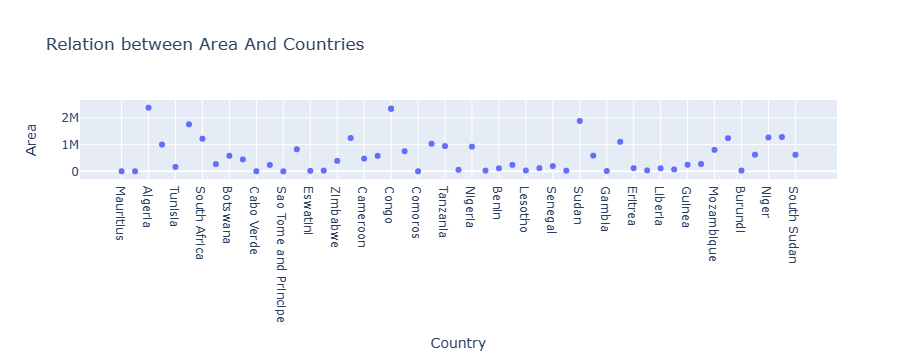

In [ ]:

fig_color_en = px.scatter(
    africa,
    x = africa['Country'],
    y = africa['Area'],
    #Color Property,
    title = 'Relation between Area And Countries'
)

fig_color_en.show()

# European countries

HDI vs GNI plot

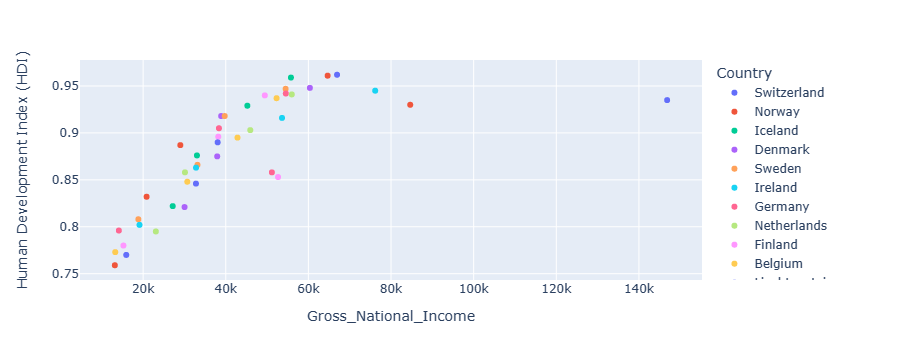

In [ ]:
fig = px.scatter(europe, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)
fig = px.scatter(europe, y="Human Development Index (HDI) ", x="Gross_National_Income", color="Country")
fig.update_traces(marker_size=6)

---------------------------------------------------------------------------------------------------------

Life expectancy at birth comparison in European countries

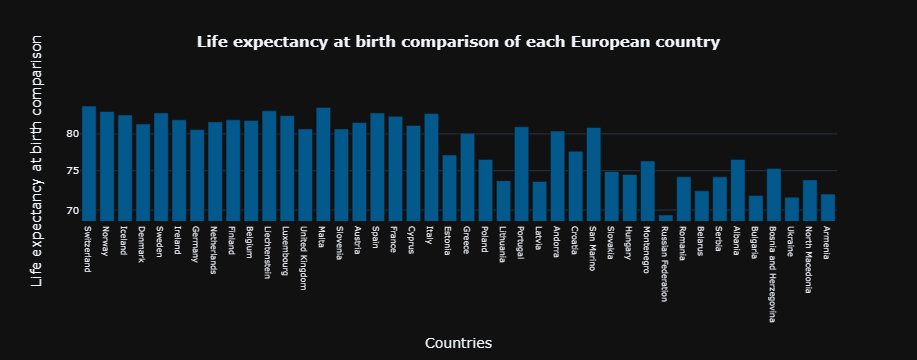

In [ ]:
df_plot = europe.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Life expectancy at birth'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Life expectancy at birth comparison of each European country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Life expectancy at birth comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Mean years of schooling comparison in European countries

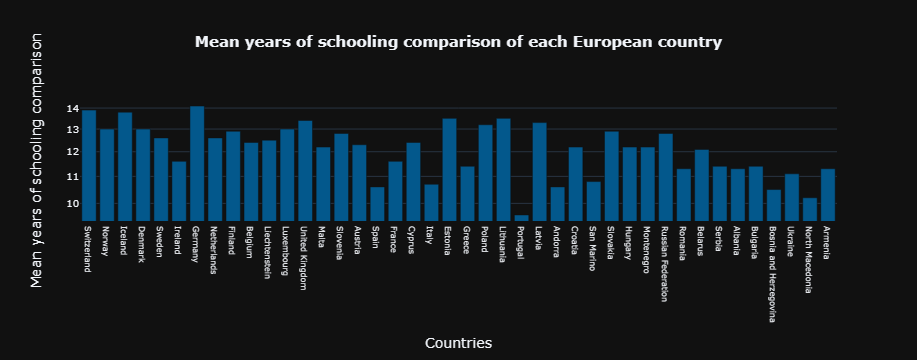

In [ ]:
df_plot = europe.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Mean years of schooling '],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Mean years of schooling comparison of each European country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Mean years of schooling comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Expected years of schooling comparison in European countries

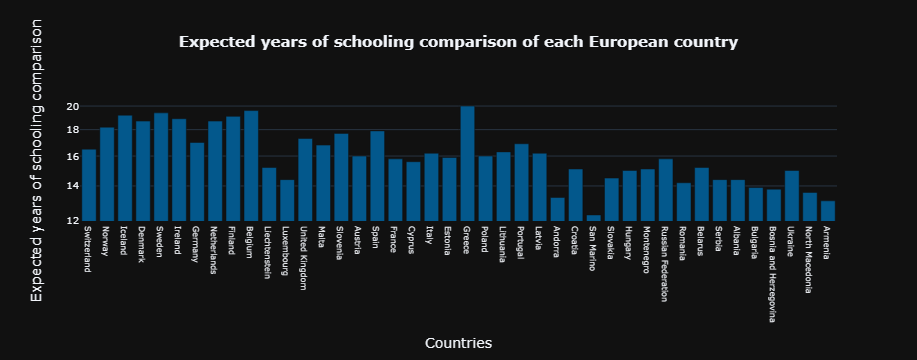

In [ ]:
df_plot = europe.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Expected years of schooling'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Expected years of schooling comparison of each European country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Expected years of schooling comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------------------

Population comparison in European countries

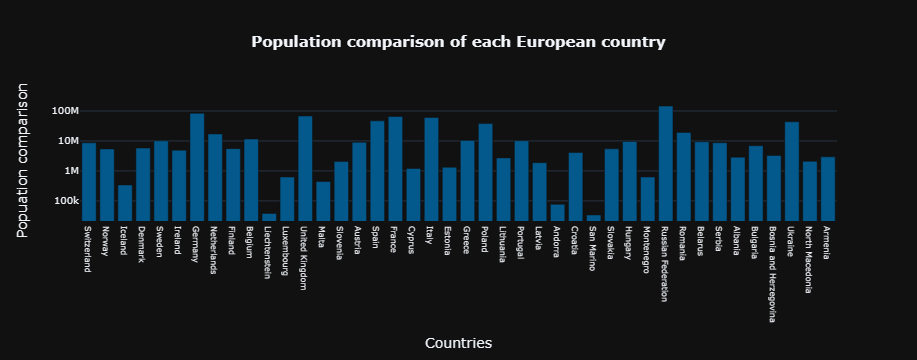

In [ ]:
df_plot = europe.reset_index()

colors = ['#03588C'] * len(df_plot.index)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = df_plot['Country'],
        y = df_plot['Population Value(2020)'],
        marker_color = colors
    ))

    
fig.update_yaxes(type = 'log')
fig.update_layout(
        {
            "title": {
                "text": f"<b>Population comparison of each European country</b>",
                "x": 0.5,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Countries",
                "showticklabels":True,
                "tickfont": {
                    "size": 8                
                }
            },
            "yaxis": {
                "title": "Popuation comparison ",
                "tickfont": {
                    "size": 10                
                }
            },
            "template":'plotly_dark'
        }
    )    

    
fig.show()

---------------------------------------------------------------------------------------------

Relation between Countries and Area

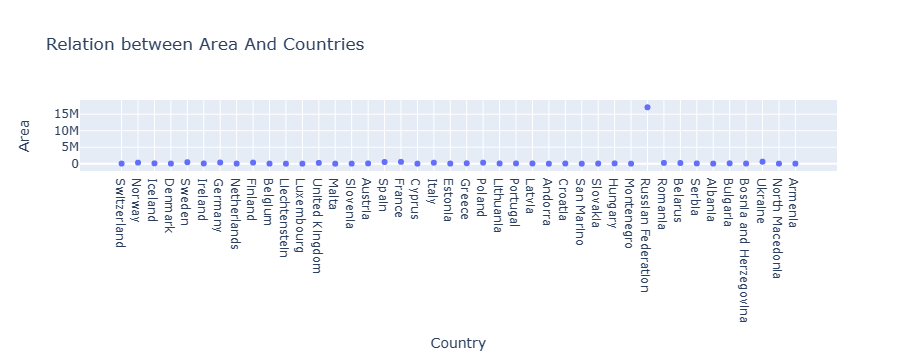

In [ ]:

fig_color_en = px.scatter(
    europe,
    x = europe['Country'],
    y = europe['Area'],
    #Color Property,
    title = 'Relation between Area And Countries'
)

fig_color_en.show()

# Q) Visualize the following : ** use daase provided in group (Fortune 500) **
    a) A box plot of The revenue of the companies
    b) Make a scatter graph comparing the revenue of top 3 companies
    c) Make a horiozontal Bar Graph of the top ompanies based on the profits they earn.